In [141]:
import os
from PIL import Image
import numpy as np
import math
import copy

In [153]:
root = '/Users/Melody/Downloads/NaV1.8.Cre.Ai32-21030201'
outputfolder = root#os.path.join(root, 'merged')

bright_threshold = 100

# name = '3R4 right'
# redpath = os.path.join(root, name + ' red.TIF')
# greenpath = os.path.join(root, name + ' green.TIF')
# output = os.path.join(outputfolder, name + '.TIF')

In [227]:
files = os.listdir(root)
files = [' '.join(x.split(' ')[0:-1]) for x in files if x[0] not in ['.', 'm', 'n']]
files = np.unique(np.array(files))
print(files)

['2R1 left 1' '2R1 left 2' '2R1 right 1' '2R1 right 2' '2R2 left 1'
 '2R2 left 2' '2R2 right 1' '2R2 right 2' '2R3 left' '2R3 right 1'
 '2R3 right 2' '2R4 left' '2R4 right' '2R5 left' '2R5 right' '2R6 left'
 '2R6 right' '2R7 left' '2R7 right' '3R1 left' '3R1 right' '3R2 left'
 '3R2 right' '3R3 left' '3R3 right' '3R4 left' '3R4 right' '3R5 left'
 '3R5 right' '3R6 left' '3R6 right' '4R1 left' '4R1 right' '4R2 left'
 '4R2 right' '4R3 left' '4R3 right' '4R4 left' '4R4 right' '4R5 left'
 '4R5 right' '4R6 left' '4R6 right' '5R1 left' '5R1 right' '5R2 left'
 '5R2 right' '5R3 left' '5R3 right' '5R4 left' '5R4 right' '5R5 left'
 '5R5 right' '5R6 left' '5R6 right' '6R1 left' '6R1 right' '6R2 left'
 '6R2 right' '6R3 left' '6R3 right']


In [230]:
for f in files:
    redpath = os.path.join(root, f + ' red.TIF')
    greenpath = os.path.join(root, f + ' green.TIF')
    output = os.path.join(outputfolder, f + '.TIF')

    try:
        red = np.array(Image.open(redpath))
        green = np.array(Image.open(greenpath))

        # bright filter
        blue = np.power(red, 1.2) > bright_threshold
        #blue = ((red > bright_threshold) * 200).astype(np.uint8)
        # size filter 目前这个filter会使符合要求的roi的边缘被crop掉，使其最后只剩一个小点，我还没有想到好的方法解决。
        blue = sizefilter(blue, sizethreshold = 3, kernalsize = 3)
        # enhance blue signal
        blue = blue * 200

        #blue = np.zeros(np.shape(red))


        final = Image.fromarray(np.stack((red, green ,blue), axis = -1).astype(np.uint8))

        final.save(output)
    except:
        print('have problem')
        pass

In [229]:
def sizefilter(img, sizethreshold = 1, kernalsize = 3):
    # This img should be binary image.
    if kernalsize % 2 == 0:
        kernalsize = kernalsize + 1
    arm = math.floor(kernalsize/2)
    [r,c] = np.shape(img)

    tmpimg = np.zeros([r + 2*arm, c + 2*arm])
    tmpimg[arm:arm+r, arm:arm+c] = img

    imgtreat = np.zeros(np.shape(img) + (kernalsize, kernalsize))#[r,c,arm,arm])
    for i in range(kernalsize):
        for j in range(kernalsize):
            imgtreat[:,:,i,j] = tmpimg[i:i+r, j:j+c]

    imgtreat = np.sum(imgtreat.reshape([-1, kernalsize, kernalsize]), axis = (1,2)).reshape([r,c])
    imgtreat = (imgtreat > sizethreshold) * img

    #print(np.shape(imgtreat))
    return(imgtreat)
    
    # tmpimg = np.zeros([r + 2*arm, c + 2*arm])
    # tmpimg[arm:arm+r, arm:arm+c] = img
    # tmpimg2 = copy.deepcopy(tmpimg)
    
    # kernal = np.ones([kernalsize, kernalsize])

    # for i in range(arm,arm+r):
    #     for j in range(arm,arm+c):
    #         tmpimg2[i,j] = np.sum(tmpimg[i-arm:i+arm+1, j-arm:j+arm+1] * kernal) > sizethreshold
    
    # finalimg = tmpimg2[arm:-arm, arm:-arm] * img
    # return(finalimg)

    


In [220]:
x = sizefilter(blue)

(520, 696)


In [204]:
a = np.arange(24).reshape([2,3,2,2])
print(a)

[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]

  [[ 8  9]
   [10 11]]]


 [[[12 13]
   [14 15]]

  [[16 17]
   [18 19]]

  [[20 21]
   [22 23]]]]


In [173]:
tmp = sizefilter(blue, sizethreshold = 2)

In [221]:
aa = Image.fromarray((x*200).astype(np.uint8))

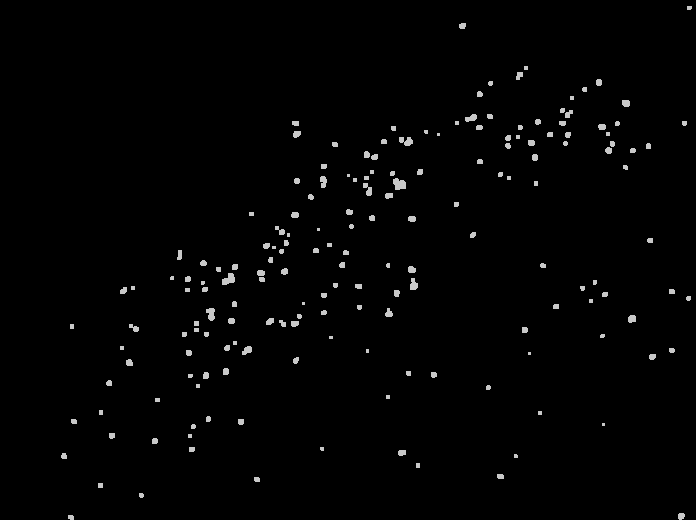

In [222]:
aa

In [119]:
arm = 2
print(np.shape(img))
np.array(np.shape(img)) + 2 * arm

(520, 696)


array([524, 700])

In [96]:
red = np.array(Image.open(redpath)) * 2
green = np.array(Image.open(greenpath))
#blue = ((red > bright_threshold) * 200).astype(np.uint8)
blue = np.zeros(np.shape(red))


final = Image.fromarray(np.stack((red, green ,blue), axis = -1).astype(np.uint8))

In [7]:
redimage = Image.open(redpath)
red = np.array(redimage)
greenimage = Image.open(greenpath)
green = np.array(greenimage)

In [82]:
files[0:1]

array(['2R1 left'], dtype='<U11')

In [16]:
bright_threshold = 100

In [36]:
blue = ((red > bright_threshold) * 200).astype(np.uint8)

In [45]:
final = Image.fromarray(np.stack((red, green ,blue), axis = -1))

In [51]:
final.save(output)

In [30]:
type(blue)

numpy.ndarray

In [39]:
final.dtype

dtype('uint8')